In [5]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage import img_as_float
import pylab
%matplotlib inline
from sklearn.cluster import KMeans

shape =  (474, 713, 3)


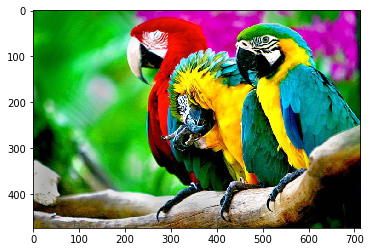

In [18]:
img_df = imread('parrots.jpg')
pylab.imshow(img)

print('shape = ', img_df.shape)

In [31]:
img = img_as_float(img_df).reshape(img.shape[0]*img.shape[1], 3)

print('shape = ', img.shape)

In [34]:
#По умолчанию KMeans выделяет 8 кластеров
km = KMeans(init='k-means++', random_state=241)
km.fit(img)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=8, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=241, tol=0.0001, verbose=0)

In [35]:
y_pred = km.predict(img)

Отрисовка получившихся кластеров


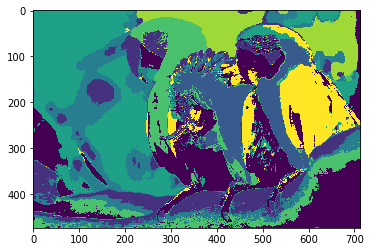

In [70]:
pylab.imshow(y_pred.reshape(474, 713), cmap='viridis')
print('Отрисовка получившихся кластеров') #их всего 8

Каждый цвет из 8 устреднен


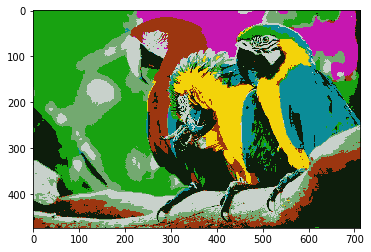

In [105]:
#теперь поставим в соответствие каждому кластеру его ср. значение
y_centered = np.array([km.cluster_centers_[i] for i in y_pred])

pylab.imshow(y_centered.reshape(474, 713, 3))
print('Каждый цвет из 8 устреднен')

In [123]:
#np.mean(img.reshape(337962, 3)[y_pred[y_pred == 2]], axis=0)

In [122]:
#Заемняем в каждом кластере цвет на медианный
y_median = np.array([np.mean(img.reshape(337962, 3)[y_pred[y_pred == i]],
                             axis=0) for i in y_pred])

При замене каждого цвета на медианный в соем кластере все выглядит гораздо хуже


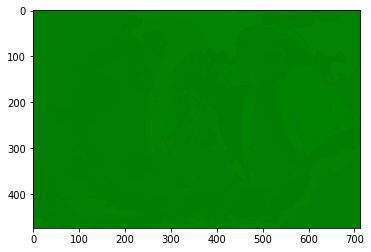

In [134]:
pylab.imshow(y_median.reshape(474, 713, 3), cmap='Greys')
print('При замене каждого цвета на медианный в соем кластере все выглядит гораздо хуже')

In [128]:
y_median

array([[0.00784314, 0.50196078, 0.01176471],
       [0.00784314, 0.50196078, 0.01176471],
       [0.00784314, 0.50196078, 0.01176471],
       ...,
       [0.01568627, 0.49411765, 0.01960784],
       [0.01568627, 0.49411765, 0.01960784],
       [0.01568627, 0.49411765, 0.01960784]])